<a href="https://colab.research.google.com/github/ccstudentcc/colab/blob/main/Pendulum_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 6.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/KAN-Symbolic_Regression/

/content/drive/MyDrive/KAN-Symbolic_Regression


In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from kan import *

# Pendulum equation inference
This is a toy example of symbolic regression in KAN.
Using the mobile app [phyphox](https://phyphox.org/), I recorded my smartphone's gyroscope and accelerometer sensors while it was swaying with a 50cm twine.
The latter is notably less accurate than the former. This is reflected in a higher loss value.

The symbolic regression gives an angular velocity of about 4 rad/s which indicates that a complete swing is made in about 0.785 s.

## Datasets plotting

/tmp/ipython-input-262805856.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_g = df_g[df_g['Time (s)'] < 175][df_g['Time (s)'] > 170]


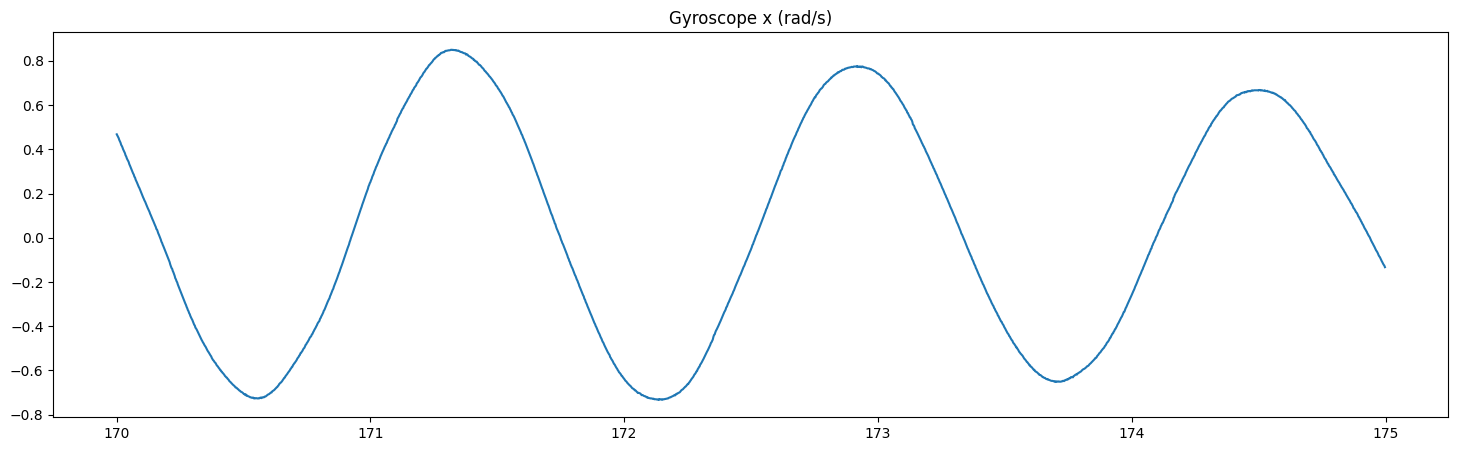

In [135]:
df_g = pd.read_csv('raw/Gyroscope.csv')
df_g = df_g[df_g['Time (s)'] < 175][df_g['Time (s)'] > 170]

fig, ax = plt.subplots()
ax.plot(df_g['Time (s)'], df_g['Gyroscope x (rad/s)'])
fig.set_size_inches(18, 5)
plt.title('Gyroscope x (rad/s)')
plt.show()

/tmp/ipython-input-2088566481.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_a = df_a[df_a['Time (s)'] < 175][df_a['Time (s)'] > 170]


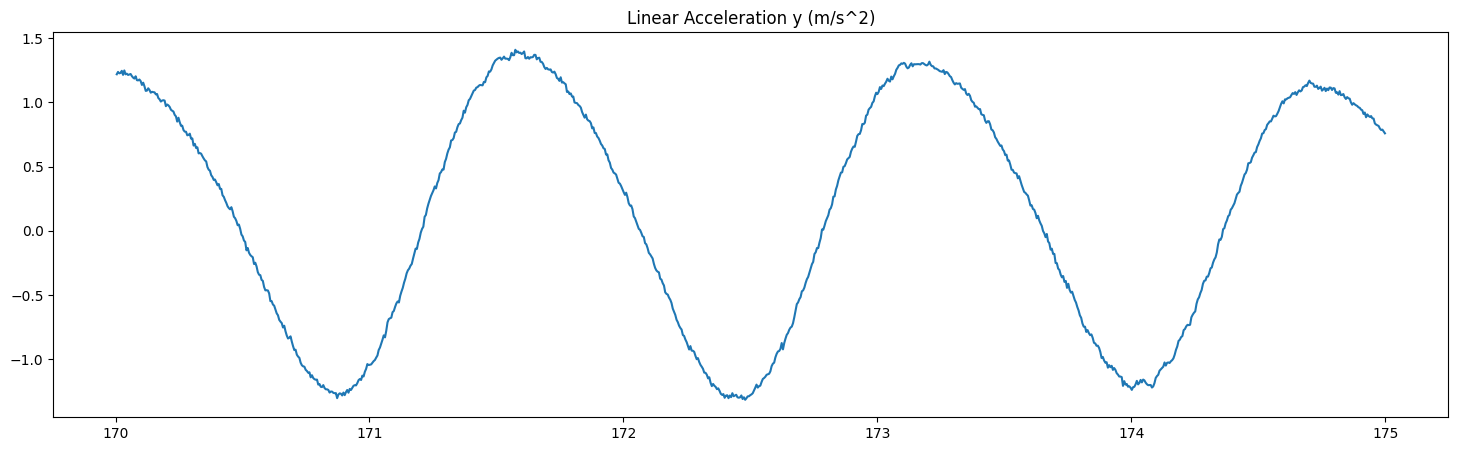

In [136]:
df_a = pd.read_csv('raw/Linear Acceleration.csv')
df_a = df_a[df_a['Time (s)'] < 175][df_a['Time (s)'] > 170]

fig, ax = plt.subplots()
ax.plot(df_a['Time (s)'], df_a['Linear Acceleration y (m/s^2)'])
fig.set_size_inches(18, 5)
plt.title('Linear Acceleration y (m/s^2)')
plt.show()

## Acceleration Symbolic Regression with KAN

In [118]:
model = KAN(width=[1, 1], grid=40, k=3, seed=0)
train_set = df_a.sample(frac=0.7, random_state=99)
test_set = df_a.drop(train_set.index)
dataset = {'train_input': torch.tensor(train_set['Time (s)'].values, dtype=torch.float32).view(-1, 1),
           'train_label': torch.tensor(train_set['Linear Acceleration y (m/s^2)'].values, dtype=torch.float32).view(-1, 1),
           'test_input': torch.tensor(test_set['Time (s)'].values, dtype=torch.float32).view(-1, 1),
           'test_label': torch.tensor(test_set['Linear Acceleration y (m/s^2)'].values, dtype=torch.float32).view(-1, 1)}


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.83e-02 | test_loss: 1.94e-02 | reg: 1.12e+00 | : 100%|█| 40/40 [00:02<00:00, 13.82it


saving model version 0.1


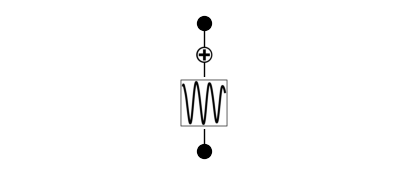

In [119]:
model.fit(dataset, opt="LBFGS", steps=40, lamb=0.1, lamb_entropy=1., lamb_l1=0.1)
model(dataset['train_input'])
model.plot()

fixing (0,0,0) with sin, r2=0.9841892123222351, c=2
saving model version 0.2
[1.23793590068817*sin(3.99999976158142*t - 6.38639974594116) + 0.0854014828801155]


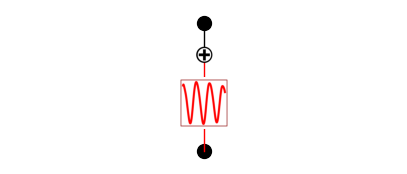

In [120]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)
model.plot()
formula, variables = model.symbolic_formula(var=['t'])
print(formula)

## Angular Velocity Symbolic Regression with KAN

In [147]:
model2 = KAN(width=[1, 1], grid=40, k=3, seed=0)
train_set2 = df_g.sample(frac=0.7, random_state=99)
test_set2 = df_g.drop(train_set2.index)
dataset2 = {
    'train_input': torch.tensor(train_set2['Time (s)'].values, dtype=torch.float32).view(-1, 1),
    'train_label': torch.tensor(train_set2['Gyroscope x (rad/s)'].values, dtype=torch.float32).view(-1, 1),
    'test_input': torch.tensor(test_set2['Time (s)'].values, dtype=torch.float32).view(-1, 1),
    'test_label': torch.tensor(test_set2['Gyroscope x (rad/s)'].values, dtype=torch.float32).view(-1, 1)
}


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.60e-03 | test_loss: 3.93e-03 | reg: 0.00e+00 | : 100%|█| 40/40 [00:04<00:00,  8.94it


saving model version 0.1


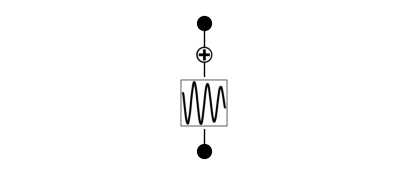

In [148]:
model2.fit(dataset2, opt="LBFGS", steps=40, lamb=0.1, lamb_entropy=0., lamb_l1=0.)
model2(dataset2['train_input'])
model2.plot()

fixing (0,0,0) with sin, r2=0.9931867718696594, c=2
saving model version 0.2


0.0398546829819679 - 0.734902322292328*sin(3.96399974822998*t + 4.10968017578125)

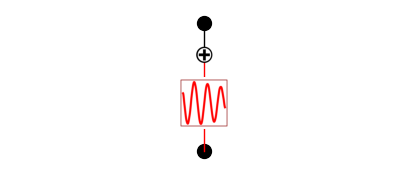

In [149]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model2.auto_symbolic(lib=lib)
model2.plot()
formula, variables = model2.symbolic_formula(var=['t'])
formula[0]